<a href="https://colab.research.google.com/github/Kandeo/Autolib-Dataset--Hypothesis-Testing/blob/main/Christine_Kandeo_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**
Autolib electric car-sharing service company has tasked us to understand Electric car usage by investigating a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

To work on this project, we will perform the following analysis with Python; 

- Finding and dealing with outliers, anomalies, and missing data within the dataset.
- Plotting appropriate univariate and bivariate summaries recording our observations.

Dataset and Glossary:

 1. Dataset: http://bit.ly/DSCoreAutolibDataset
 
 2.  Glossary: http://bit.ly/DSCoreAutolibDatasetGlossary 
 

The dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).



# **Defining the Question**

**Specific Data Analytics question**

A survey carried out by Bollore Industry claimed that they found no significant difference  between the average number of Autolib Bluecars taken in Val-d'Oise and Yvelines during the weekends.

At a 5% level of significance, this analysis seeks to find out if there is any statistical evidence to support the claim.

**Metrics for Success**

Performing a hypothesis test that will help  accept/reject the claim that the average number of Autolib Blue cars taken in the 2 areas of Val-d'Oise and Yvelines have no significant difference.

**Understanding the Context**

This dataset contains daily aggregation by date and postal code of the number of events on the autolib network. The observations capture the number of Bluecars taken and returned in the areas, the specific days of the week, the number of daily data points available for aggregation and the number of recharging slots released and taken.

**Experimental Design**

1. Data Loading
 - Loading libraries

2. Data Cleaning
 - Dealing with relevant/irrelevant observations
 - Handling missing/duplicate values
 - Checking for Outliers and anomalies

3. Exploratory Data Analysis
 - Univariate analysis
 - Bivariate analysis

4. Hypothesis testing
 - Stating the hypothesis
 - Identifying the test statistics
 - Analysis and conclusions
 

# **Data Loading**

In [ ]:
#Importing Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

#Reading and Previewing Our Dataset:
df = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
df.head(4)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21


Checking the Data

In [ ]:
#Checking the Shape of the Dataset:
df.shape


(16085, 13)

The dataset has 16,085 Rows and 13 Columns

In [ ]:
#Identifying the Datatypes in each column:
df.dtypes


Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# **Data Cleaning**

Adding of Relevant Observations

In [ ]:
#Creating a column indicating the days of the week:

def Check(df):
   if df['dayOfWeek']== 0:
      return "Monday"
   elif df['dayOfWeek']== 1:
      return "Tuesday"
   elif df['dayOfWeek']== 2:
      return "Wednesday"
   elif df['dayOfWeek']== 3:
      return "Thursday"
   elif df['dayOfWeek']== 4:
      return "Friday"
   elif df['dayOfWeek']== 5:
      return "Saturday"
   else:
     return 'Sunday'

df['Day_Of_Week'] = df.apply(Check, axis=1)
df.head(4)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Day_Of_Week
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20,Monday
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22,Tuesday
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27,Wednesday
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21,Thursday


In [ ]:
#Adding a column that assigns Postal codes the Departments/Areas they are located in:

def Check(df):
   if (df['Postal code'] >= 75001) & (df['Postal code'] <= 75116):
      return "Paris"
   elif (df['Postal code'] >= 78000) & (df['Postal code'] <= 78150):
      return "Yvelines"
   elif (df['Postal code'] >= 91330) & (df['Postal code'] <= 91400):
      return "Essonne"
   elif (df['Postal code'] >= 92000) & (df['Postal code'] <= 92800):
      return "Hauts-de-Seine"
   elif (df['Postal code'] >= 93100) & (df['Postal code'] <= 93800):
      return "Seine-Saint-Denise"
   elif (df['Postal code'] >= 94000) & (df['Postal code'] <= 94800):
      return "Val-de-Marne"
   else:
     return "Val-d'Oise"

df['Department'] = df.apply(Check, axis=1)
df.head(4)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Day_Of_Week,Department
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20,Monday,Paris
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22,Tuesday,Paris
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27,Wednesday,Paris
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21,Thursday,Paris


Irrelevant Observations

In [ ]:
#Since the analysis will mainly focus on the Blue cars, columns with data on Utilib and Utilib 14 are dropped:
df.drop(df.columns[[3, 7, 8, 9, 10]], axis=1, inplace = True)
df.head()


,Postal code,date,n_daily_data_points,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum,Day_Of_Week,Department
0,75001,1/1/2018,1440,weekday,110,103,22,20,Monday,Paris
1,75001,1/2/2018,1438,weekday,98,94,23,22,Tuesday,Paris
2,75001,1/3/2018,1439,weekday,138,139,27,27,Wednesday,Paris
3,75001,1/4/2018,1320,weekday,104,104,25,21,Thursday,Paris
4,75001,1/5/2018,1440,weekday,114,117,18,20,Friday,Paris


Renaming Column names

In [ ]:
#Renaming columns for ease:
df1 = df.rename(columns = {'Postal code': 'Postal_Code', 'date':'Date','n_daily_data_points':'Daily_Data_Points','day_type':'Type_of_Day','BlueCars_taken_sum':'Taken_Bluecars','BlueCars_returned_sum':'Returned_Bluecars','Slots_freed_sum':'Free_Slots','Slots_taken_sum':'Taken_Slots'})


Assigning Date Column the correct datatype

In [ ]:
#Converting dates to datetime:
df1['Date']= pd.to_datetime(df1['Date'])
df1.head(4)


,Postal_Code,Date,Daily_Data_Points,Type_of_Day,Taken_Bluecars,Returned_Bluecars,Free_Slots,Taken_Slots,Day_Of_Week,Department
0,75001,2018-01-01,1440,weekday,110,103,22,20,Monday,Paris
1,75001,2018-01-02,1438,weekday,98,94,23,22,Tuesday,Paris
2,75001,2018-01-03,1439,weekday,138,139,27,27,Wednesday,Paris
3,75001,2018-01-04,1320,weekday,104,104,25,21,Thursday,Paris


Missing and Duplicate values

In [ ]:
#Checking for Missing values:
df1.isnull().sum()


Postal_Code          0
Date                 0
Daily_Data_Points    0
Type_of_Day          0
Taken_Bluecars       0
Returned_Bluecars    0
Free_Slots           0
Taken_Slots          0
Day_Of_Week          0
Department           0
dtype: int64

In [ ]:
#Checking for Duplicates:
df1.duplicated().sum()


0

Outliers and Anomalies

Text(0, 0.5, 'Frequency')

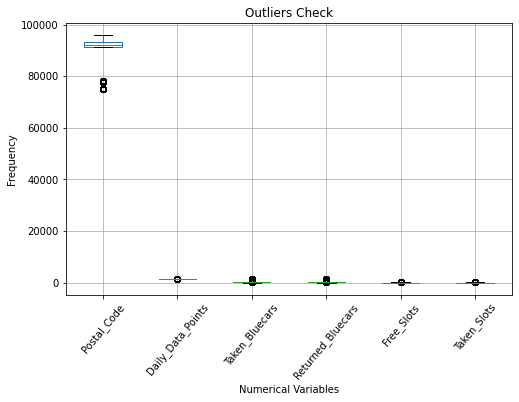

In [ ]:
#Checking for outliers:
df1.boxplot(figsize=(8, 5), fontsize=10, grid=True, rot= 50)
plt.title('Outliers Check')
plt.xlabel('Numerical Variables')
plt.ylabel('Frequency')


In this case, we choose not to drop any outlier as this are valid observations.

Measuring Variability

In [ ]:
#Finding IQR:
Q1 = df1['Taken_Bluecars'].quantile(0.25)
Q3 = df1['Taken_Bluecars'].quantile(0.75)
Q1, Q3      #Q1=20 and Q3=135

#Finding Interquartile
IQR = Q3 - Q1
IQR         

#Finding the Lower and Upper Limits:
#lower_limit = Q1-1.5*IQR
#upper_limit = Q3+1.5*IQR
#lower_limit, upper_limit


115.0

The middle of the taken bluecars when ordered from lowest to highest is 115

Exporting dataset

In [ ]:
df1.to_csv('CleanedAutolib.csv')


# **Exploratory Data Analysis**

**Univariate Analysis**

We perform this analysis with an aim of describing the data and finding patterns that exist within.

- Numerical Variables

In [ ]:
#Describing variables based on the Central Tendency:
df1.describe()


,Postal_Code,Daily_Data_Points,Taken_Bluecars,Returned_Bluecars,Free_Slots,Taken_Slots
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,125.926951,125.912714,22.629033,22.629282
std,7647.342000,33.212050,185.426579,185.501535,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,20.000000,20.000000,0.000000,0.000000
50%,92340.000000,1440.000000,46.000000,46.000000,0.000000,0.000000
75%,93400.000000,1440.000000,135.000000,135.000000,5.000000,5.000000
max,95880.000000,1440.000000,1352.000000,1332.000000,360.000000,359.000000


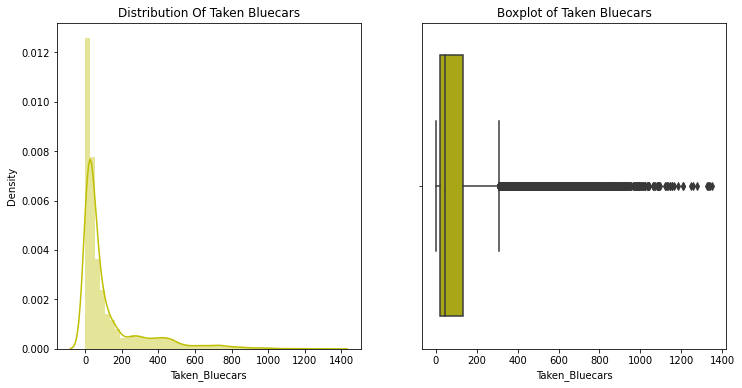

In [ ]:
#Plotting a boxplot on the bluecars taken to view the distribution:
fig,axes=plt.subplots(1,2, figsize=(12,6))
sns.distplot(df1.Taken_Bluecars, hist=True, kde=True, color='y', ax=axes[0])

#To also plot the Range:
sns.boxplot(df1.Taken_Bluecars, color='y', ax=axes[1])
axes[0].set_title('Distribution Of Taken Bluecars')
axes[1].set_title('Boxplot of Taken Bluecars')

plt.show()


Data on the total bluecars taken is skewed to the right meaning that the mean value will be greater than the median and mode

- Categorical Variable

Area Distribution

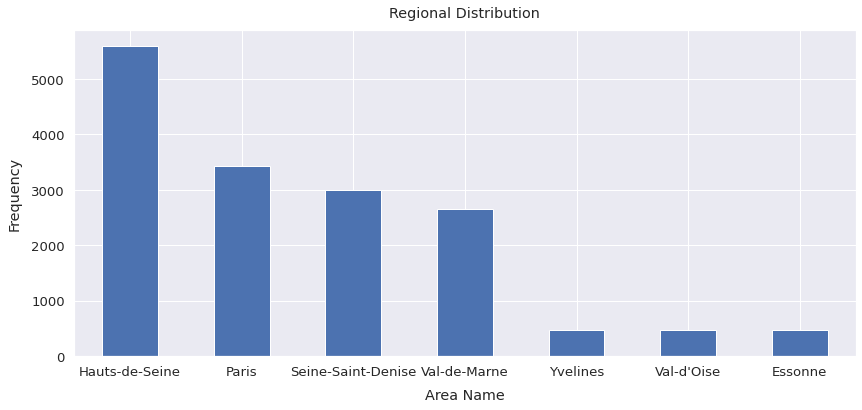

In [ ]:
#Viewing the distribution of data in terms of the regional departments:
df1['Department'].value_counts() 

#Visualizing the Information on a bar chart:
sns.set(font_scale=1.2)
df1['Department'].value_counts().plot(kind='bar', figsize=(14, 6), rot=0)
plt.xlabel("Area Name", labelpad=10)
plt.ylabel("Frequency", labelpad=10)
plt.title("Regional Distribution", y=1.02);    

Out of the 16,085 Postal codes, Hauts-de-Seine reported the highest number of observations with 5,601 followed by Paris with 3,431.

Type of Day

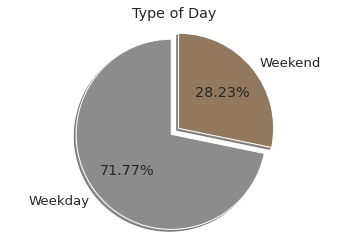

In [ ]:
#Categorising our data based on the type of day:
df1['Type_of_Day'].value_counts()
# Weekday: 11,544      Weekend: 4,541

#Visualising the information on a pie chart:
labels= ['Weekday','Weekend']
colors=['C7', 'C5']
sizes= [11544, 4541]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0, 0.1), autopct='%1.2f%%')
plt.title('Type of Day')
plt.axis('equal')
plt.show()



72% of the data collected was from a weekday

Day of the week

In [ ]:
#Viewing the Data in terms of Days of the week:
df1['Day_Of_Week'].value_counts()


Monday       2374
Tuesday      2363
Sunday       2274
Friday       2271
Thursday     2268
Wednesday    2268
Saturday     2267
Name: Day_Of_Week, dtype: int64

Monday had the highest number of activites from the dataset.

**Findings**

From this analysis;

- Since most of the observations captured were from unique postal codes, no outlier was dropped on the total blue cars taken  hence the data does not follow a normal distribution. 
- Hauts-de-Seine had the highest number of observations.
- Majority of the information was picked from a weekday.

Recommendations;
- Further analysis to be performed to detect any relationship between the different variables



**Bivariate Analysis**

This analysis is conducted with an aim of determining whether a statistical association exists between any two variables in our dataset.

- Numerical Variables

Correlation Test

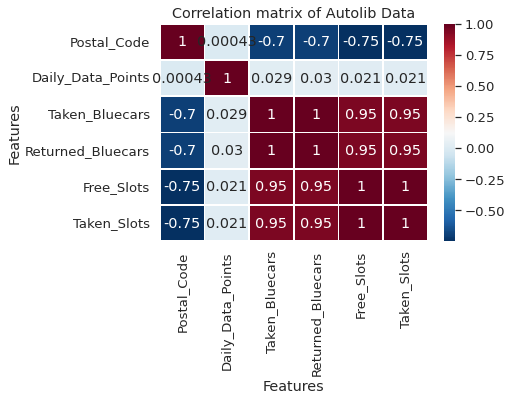

In [ ]:
#To check for correlation between our variables:
Corr = df1.corr(method='pearson')
Corr

import seaborn as sb

#Visualizing this for comparisons:
sb.heatmap(Corr, xticklabels=Corr.columns, yticklabels=Corr.columns, cmap='RdBu_r', annot=True, linewidth=0.7)
plt.title("Correlation matrix of Autolib Data")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


From the above correlation matrix;

- A strong correlation of 1 exists between Bluecars taken and Bluecars returned.

- A strong 0.95 linear relationship between bluecars taken with Free slots and taken slots is evidenced.

- There exists no relationship between the variables indicating the Postal codes and Daily data points

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


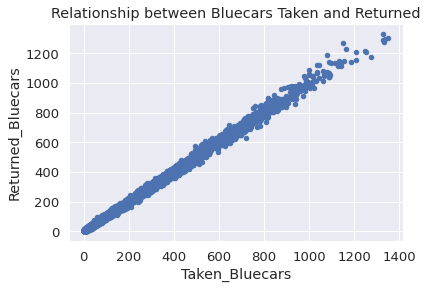

In [ ]:
#Visualizing the relationship between Bluecars taken and Bluecars returned:
df1.plot(x = 'Taken_Bluecars', y = 'Returned_Bluecars', kind='scatter')
plt.title('Relationship between Bluecars Taken and Returned')
plt.xlabel('Taken_Bluecars')
plt.ylabel('Returned_Bluecars')
plt.show()


- Categorical Variables

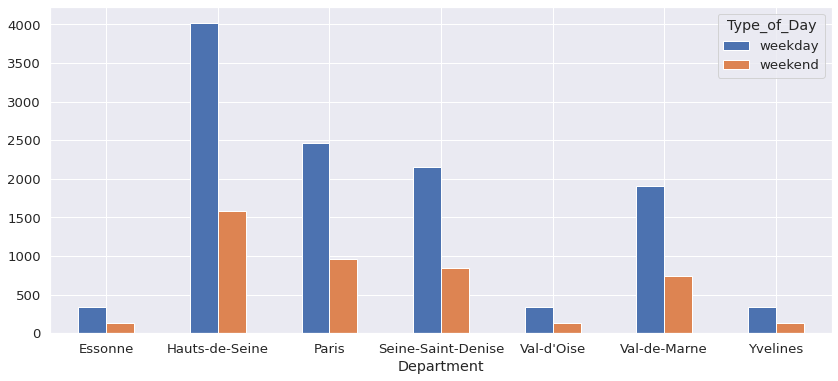

In [ ]:
#To show the type of day data was gathered per the different areas:
C=pd.crosstab(index=df1['Department'],columns=df1['Type_of_Day'])
C.plot.bar(figsize=(14,6), rot=0)


Most of the car sharing and recharging activites captured in the different areas happened during weekdays

In [ ]:
#To view the average number of blue cars taken each day:
df1.groupby(['Day_Of_Week'])['Taken_Bluecars'].mean().sort_values(ascending=False)

Day_Of_Week
Saturday     156.124393
Sunday       146.071240
Friday       127.056803
Thursday     116.052469
Wednesday    115.453704
Monday       111.159646
Tuesday      110.850614
Name: Taken_Bluecars, dtype: float64

Saturday and Sunday reported the highest number of Bluecars taken

Pairplot

The plot helps visualise the relationship beween the different Observations

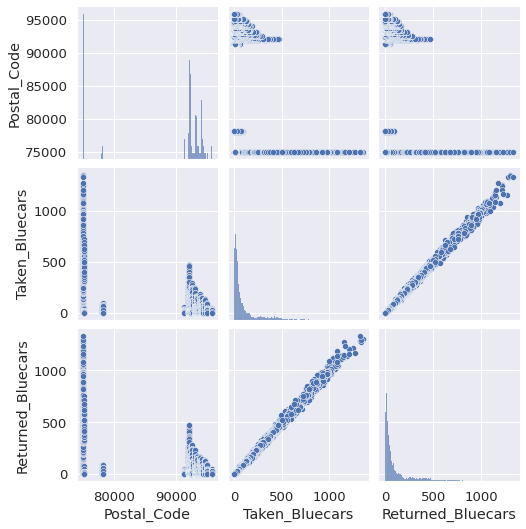

In [ ]:
df1.drop(df1.columns[[2, 6, 7]], axis=1, inplace = True)
sns.pairplot(df1)
plt.show()

**Findings**

From the analysis above;

- A strong relationship exists between the number of Bluecars taken and Bluecars returned, Free slots and Taken slots.
- A negative relationship exists between the Postal code areas and the Bluecars taken.

Recommendation;
- Variables selected for hypothesis testing be tested for dependency to ensure data accuracy.



# **Hypothesis Testing**

The main objective of this analysis is to test if there Is any significant difference in the average number of bluecars taken in Yvelines and Val-d’Oise during the weekend.

To perform this test we shall follow the below steps;



**Step 1**: Stating the Hypothesis

**Ho**: There is no significant difference between the average number of Bluecars taken during the weekend in Yvelines and Val-d’Oise.

**Ha**: There is a significant difference between the average number of Bluecars taken during the weekend in Yvelines and Val-d’Oise




**Step 2**: Analysis Plan

In [ ]:
#Creating a dataframe containing the 2 areas:
Population = df1.loc[df1['Department'].isin(['Yvelines',"Val-d'Oise"]) & df1['Type_of_Day'].isin(['weekend'])]
Population.head(5)

,Postal_Code,Date,Daily_Data_Points,Type_of_Day,Taken_Bluecars,Returned_Bluecars,Free_Slots,Taken_Slots,Day_Of_Week,Department
3436,78000,2018-01-06,1437,weekend,68,62,0,0,Saturday,Yvelines
3437,78000,2018-01-07,1440,weekend,67,60,0,0,Sunday,Yvelines
3443,78000,2018-01-13,1440,weekend,64,65,0,0,Saturday,Yvelines
3444,78000,2018-01-14,1440,weekend,70,62,0,0,Sunday,Yvelines
3450,78000,2018-01-20,1439,weekend,80,76,0,0,Saturday,Yvelines


In [ ]:
#Droping irrelevant observations:
Population.drop(Population.columns[[0, 1, 2, 5, 6, 7, 8]], axis=1, inplace = True)
Population.head(5)

,Type_of_Day,Taken_Bluecars,Department
3436,weekend,68,Yvelines
3437,weekend,67,Yvelines
3443,weekend,64,Yvelines
3444,weekend,70,Yvelines
3450,weekend,80,Yvelines


In [ ]:
#Describing the Population Data:
Population['Taken_Bluecars'].describe()

count    264.000000
mean      38.946970
std       21.264159
min        0.000000
25%       23.750000
50%       32.000000
75%       54.250000
max      104.000000
Name: Taken_Bluecars, dtype: float64

The Population Mean is 38.95 and Standard Deviation is 21.26

**Step 3**: Choosing a Level of Significance

The level of significance/Alpha is 5% while Confidence level is 95%

**Step 4**: Choosing the Test Statistic

A 2 Sample Z test is used to test the hypothesis. The test is 2 tailed with a critical region of + or - 1.960

**Step 5**: Validating the data meets the conditions needed to perform a Z Test:

1. Sample Size be greater than 30 and randomly selected


The Sample is picked from the Population data using stratified random sampling

In [ ]:
# Generating a Stratified random sample:
Sample = Population.groupby('Department', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(n=99))
Sample.head(5)


,Type_of_Day,Taken_Bluecars,Department
15995,weekend,40,Val-d'Oise
15704,weekend,46,Val-d'Oise
15806,weekend,31,Val-d'Oise
15894,weekend,38,Val-d'Oise
15935,weekend,28,Val-d'Oise


The Number of observations/Sample size is 198 hence greater than 30

In [ ]:
#Describing the Sample Data:
Sample['Taken_Bluecars'].describe()

count    198.000000
mean      39.126263
std       21.697253
min        1.000000
25%       24.000000
50%       32.000000
75%       55.750000
max      104.000000
Name: Taken_Bluecars, dtype: float64

The Sample Mean is 39.13 and the Standard deviation is 21.69

2. Data Points should be Independent from each other

Creating our 2 samples;

The first sample will contain information on Bluecars taken in Yvelines while the second sample will be of Bluecars taken in Val-d'Oise.

- Sample 1 = Yvelines
- Sample 2 = Val 

In [ ]:
#Creating a dataframe for the first sample
Yvelines = Sample.loc[Sample['Department'].isin(['Yvelines'])]
Yvelines.head(5)

,Type_of_Day,Taken_Bluecars,Department
3503,weekend,78,Yvelines
3844,weekend,84,Yvelines
3708,weekend,30,Yvelines
3517,weekend,52,Yvelines
3816,weekend,58,Yvelines


In [ ]:
#Creating a dataframe for the second sample:
Val = Sample.loc[Sample['Department'].isin(["Val-d'Oise"])]
Val.head()

,Type_of_Day,Taken_Bluecars,Department
15995,weekend,40,Val-d'Oise
15704,weekend,46,Val-d'Oise
15806,weekend,31,Val-d'Oise
15894,weekend,38,Val-d'Oise
15935,weekend,28,Val-d'Oise


In [ ]:
#Testing for independency on the 2 samples:

from scipy.stats import spearmanr
spearmanr(Yvelines['Taken_Bluecars'], Val['Taken_Bluecars'])    

SpearmanrResult(correlation=-0.05594527459888076, pvalue=0.5823125537397589)

Since the pvalue is greater than 0.05, this confirms the 2 samples are independent from each other

3. Data should follow a normal distribution

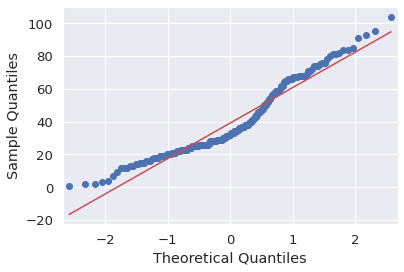

In [ ]:
#To perform a normality test on our sampled data:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

Check = Sample['Taken_Bluecars']
qqplot(Check, line='s')
pyplot.show()


In [ ]:
#Using shapiro:
from scipy import stats
from scipy.stats import shapiro

stat, p = shapiro(Check)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.934, p=0.000
Sample does not look Gaussian


The sample did not pass the normality test. Since our sample size is large, then the z test can still be performed

4. Sample sizes should be equal if at all possible

In [ ]:
#To view the sample size of the 2 samples:
Sample['Department'].value_counts()

Yvelines      99
Val-d'Oise    99
Name: Department, dtype: int64

Both samples have a sample size of 99

In [ ]:
# Checking the power of the two sample z test

from statsmodels.stats.power import zt_ind_solve_power

alpha=0.05
ratio=(99/99)
effect_size= 0.3

statistical_power = zt_ind_solve_power(effect_size=effect_size, nobs1=97, alpha=alpha, power=None, ratio=ratio, alternative='two-sided')
print("The statistical power is: {0}".format(statistical_power))

The statistical power is: 0.5514632863091699


The power of the test conducted is 55%. 

Some of the factors that could have affected the statistical power of the test include:

- The population not following a normal distribution

Finding the Point Estimates and Confidence Interval

In [ ]:
#To find the Point Estimate:
Population['Taken_Bluecars'].mean() - Sample['Taken_Bluecars'].mean()

-0.17929292929292728

The Sample mean tends to be an overestimate for the population mean

In [ ]:
#Finding the Confidence Interval:
import math

Sample_Mean = Sample['Taken_Bluecars'].mean()

z_critical = stats.norm.ppf(q = 0.975) 

print("z-critical value:")             
print(z_critical)                        

Pop_std = Population['Taken_Bluecars'].std() 

margin_of_error = z_critical * (Pop_std/math.sqrt(198))

confidence_interval = (Sample_Mean - margin_of_error,
                       Sample_Mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(36.16440815292936, 42.088117099595884)


We are 95% confident that the mean of the population is between 36.16 and 42.09



**Step 6**: Calculating the Test Statistic

Since the data meets the conditions required to use a Z test, we calculate the test statistic

In [ ]:
#Finding the Mean and Std for sample 1:
M1 = Yvelines['Taken_Bluecars'].mean()
M1
S1 = Yvelines['Taken_Bluecars'].std() 
S1

20.45421653919106

In [ ]:
#Finding the Mean and Std for the second Sample:
M2 = Val['Taken_Bluecars'].mean()
M2
S2 = Val['Taken_Bluecars'].std() 
S2

15.514298735840233

In [ ]:
#Finding the Z Test:
alpha = 0.05
n1 = Yvelines['Taken_Bluecars'].count() 
n2 = Val['Taken_Bluecars'].count() 

sp = math.sqrt(((n1-1)*S1**2+(n2-1)*S2**2)/(n1+n2-2)) 
print(f"The pooled estimate of the commom stdev is: {round(sp,3)}, which is a value between {round(S1, 3)} and {round(S2,3)}")

# calculate the z-score
z = (M1-M2)/(sp*(math.sqrt((1/n1+1/n2))))
print(f"The z-score statistic is: {z}")

The pooled estimate of the commom stdev is: 18.153, which is a value between 20.454 and 15.514
The z-score statistic is: 9.243003811812054


In [ ]:
#Finding the P-Value:
import statistics
from scipy.stats import norm

p = 1 -norm.cdf(z)
print(f"p-value is: {p}")

p-value is: 0.0


Alternatively:

In [ ]:
#Calculating the test statistic:

from statsmodels.stats.weightstats import ztest as ztest
ztest(Yvelines['Taken_Bluecars'], Val['Taken_Bluecars'], value=0) 

(9.243003811812056, 2.3967245433832354e-20)

**Step 7**: Statistical Decision

Since the Z Value of 9.24 lies outside the critical region of 1.96 and the P-Value is less than 0.05 we reject the Null hypothesis.

There is sufficient evidence at the 0.05 level to conclude that there is a significant difference in the average number of bluecars taken in our 2 samples.

**Conclusion**

The statistical decision implies that the average number of Bluecars taken on the weekend in Yvelines and Val-d'Oise is not the same hence we fail to support the claim stated by the Survey.



Link to the Hypothesis Report:

 https://docs.google.com/document/d/1YCWs3iZJnUbCk91UHFZaF1jgxDmICInL6FrMBOhQUgY/edit?usp=sharing
